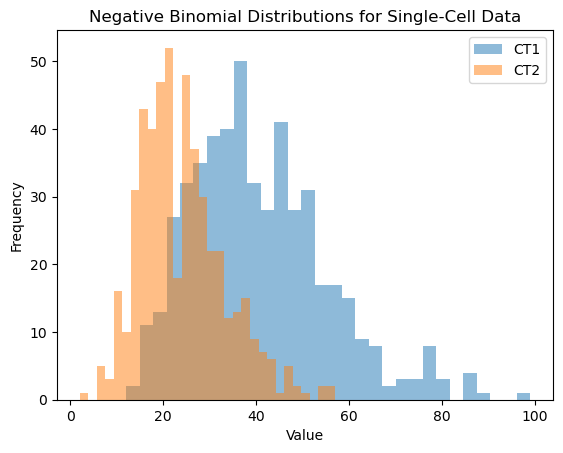

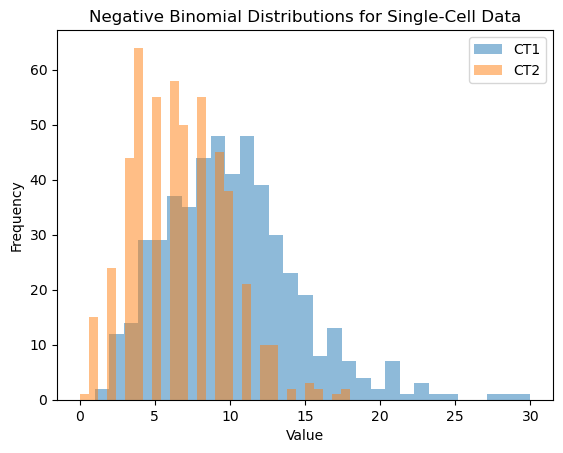

ct1_data matrix (2xN):
 (2, 500)
ct2_data matrix (2xN):
 (2, 500)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gene_distribution(prob1, prob2, size=10, num_cells=500, seed=42, save_data=False, print_data=False, plotit=False):
    # Set a random seed for reproducibility
    np.random.seed(seed)
    
    # Generate negative binomial data for two cell types
    ct1_data = np.random.negative_binomial(size, prob1, num_cells)
    ct2_data = np.random.negative_binomial(size, prob2, num_cells)
    
    # Optionally print the data
    if print_data:
        print("CT1 Data:", ct1_data)
        print("CT2 Data:", ct2_data)
    
    # Save the data if requested
    if save_data:
        np.savetxt('ct1_data.csv', ct1_data, delimiter=',')
        np.savetxt('ct2_data.csv', ct2_data, delimiter=',')
        print("Data saved as 'ct1_data.csv' and 'ct2_data.csv'")
    
    if plotit:
        # Create histograms for both distributions
        plt.hist(ct1_data, bins=30, alpha=0.5, label='CT1')
        plt.hist(ct2_data, bins=30, alpha=0.5, label='CT2')
    
        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Negative Binomial Distributions for Single-Cell Data')
    
        # Add legend
        plt.legend(loc='upper right')
    
        # Show the plot
        plt.show()

    # Return the data for further use if needed
    return ct1_data, ct2_data

# Example of using the function
ct1_data_g1, ct2_data_g1 = simulate_gene_distribution(0.2, 0.3, save_data=False, print_data=False, plotit=True)
ct1_data_g2, ct2_data_g2 = simulate_gene_distribution(0.5, 0.6, save_data=False, print_data=False, plotit=True)

# Create 2xN matrix where N is the number of cells
ct1_data = np.vstack([ct1_data_g1, ct1_data_g2])  # Stack along the rows (2xN for ct1)
ct2_data = np.vstack([ct2_data_g1, ct2_data_g2])  # Stack along the rows (2xN for ct2)

# Display the resulting matrices
print("ct1_data matrix (2xN):\n", ct1_data.shape)
print("ct2_data matrix (2xN):\n", ct2_data.shape)


In [18]:
import numpy as np

def min_max_scale(data):
    """
    Min-max scale the input data to the range [-π/2, π/2] by row (gene).

    Args:
        data (numpy array): The data to be scaled (rows are genes, columns are cells).

    Returns:
        numpy array: The scaled data in the range [-π/2, π/2], scaled row-wise.
    """
    # Initialize a new array to store the scaled data
    scaled_data = np.empty_like(data, dtype=float)

    # Apply min-max scaling to each row (gene) individually
    for i in range(data.shape[0]):  # Iterate over rows (genes)
        min_value = np.min(data[i])
        max_value = np.max(data[i])
        
        # Perform min-max scaling to the range [-π/2, π/2]
        scaled_data[i] = ((data[i] - min_value) / (max_value - min_value)) * (np.pi / 2 - (-np.pi / 2)) - (np.pi / 2)
    
    return scaled_data

# Apply scaling to each gene (row) for both cell types
ct1_data_scaled = min_max_scale(ct1_data)  # Scale each gene (row) for ct1_data
ct2_data_scaled = min_max_scale(ct2_data)  # Scale each gene (row) for ct2_data

# Display the resulting scaled data
print("Scaled ct1_data:\n", ct1_data_scaled)
print("Scaled ct2_data:\n", ct2_data_scaled)
print("Scaled shape ct1_data:\n", ct1_data_scaled.shape)
print("Scaled shape ct2_data:\n", ct2_data_scaled.shape)

Scaled ct1_data:
 [[-0.30693721 -0.5958193  -1.02914242 -0.41526799 -1.10136294 -0.70415008
  -1.06525268 -0.70415008 -0.84859112  0.16249617 -0.16249617 -1.57079633
  -0.81248086 -0.88470138 -0.70415008 -0.63192956 -0.88470138 -0.88470138
  -0.23471669  0.30693721 -0.66803982  0.05416539 -0.52359878 -0.5958193
  -0.41526799 -0.5958193  -0.52359878 -1.20969372 -0.88470138 -0.41526799
  -1.3180245  -0.27082695 -0.81248086 -1.20969372  0.16249617 -1.24580398
  -0.7763706  -0.70415008 -0.66803982 -0.52359878 -1.1374732  -0.37915773
  -0.88470138 -0.37915773 -0.74026034 -0.81248086 -0.84859112 -0.09027565
  -0.7763706  -0.74026034 -0.5958193   1.1374732  -0.30693721 -0.41526799
  -0.7763706  -0.12638591 -0.41526799 -1.1374732   0.01805513 -0.12638591
  -0.27082695 -0.23471669  0.7763706  -1.10136294 -0.7763706  -1.02914242
  -1.46246555 -0.27082695 -1.20969372 -0.66803982  0.34304747 -0.70415008
  -0.7763706  -0.52359878 -0.41526799 -1.17358346 -0.92081164  0.09027565
   0.27082695 -1.2819

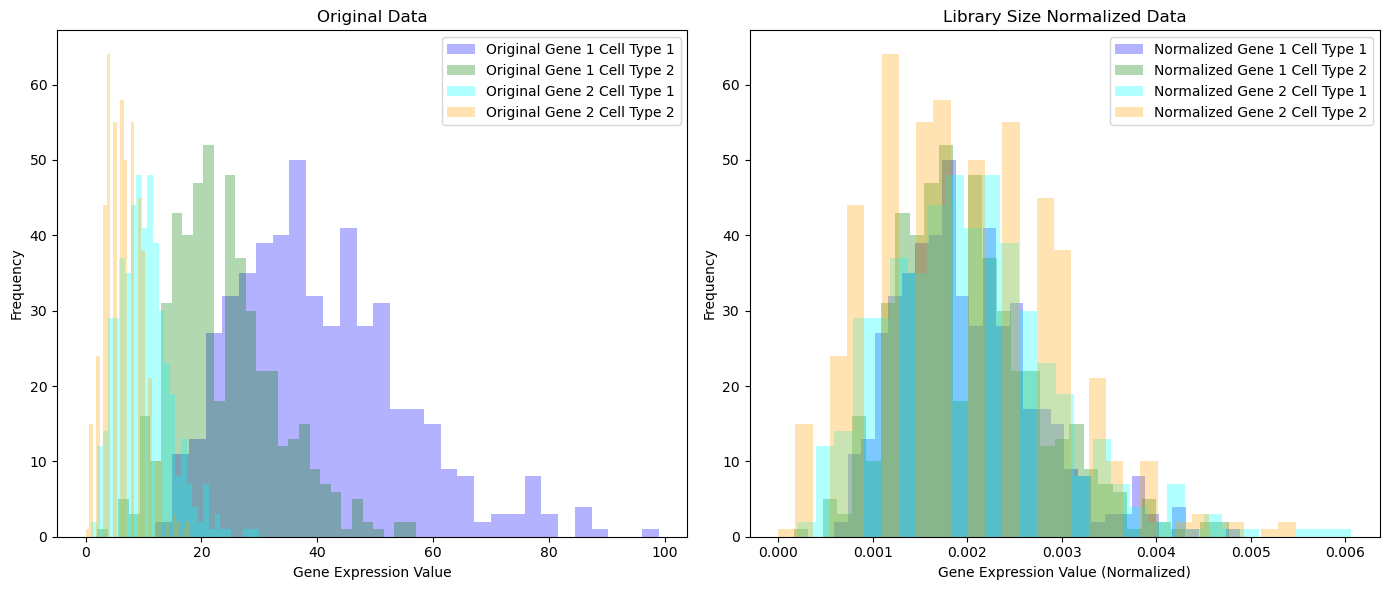

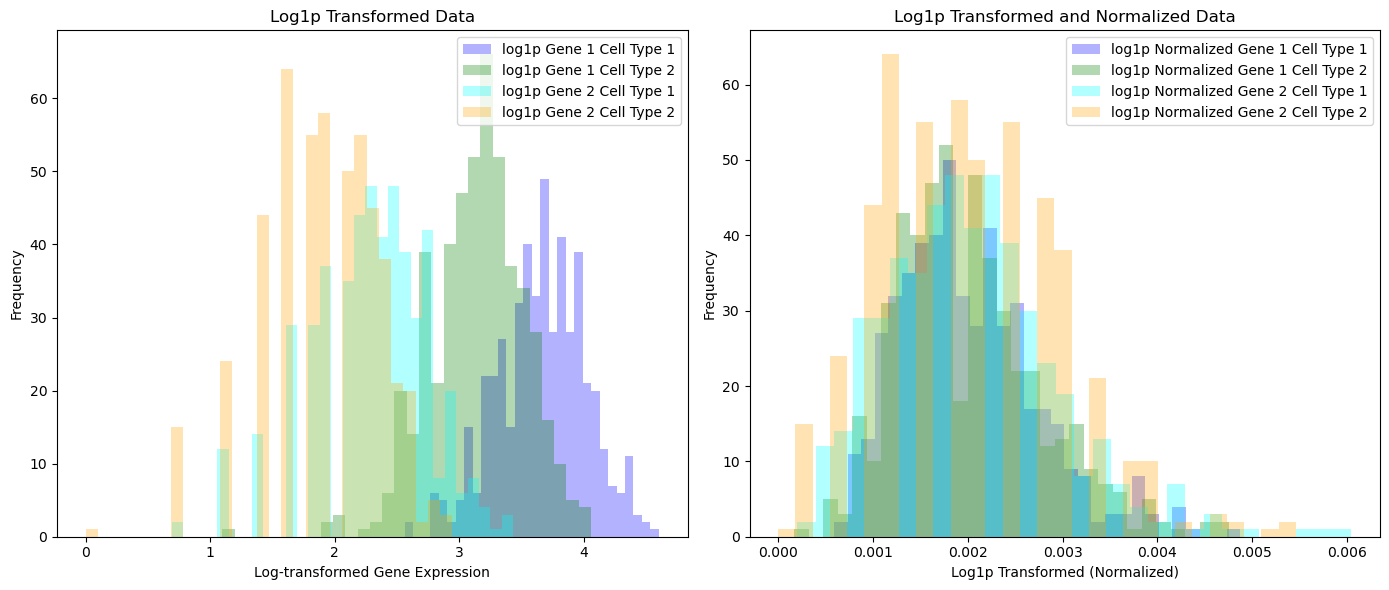

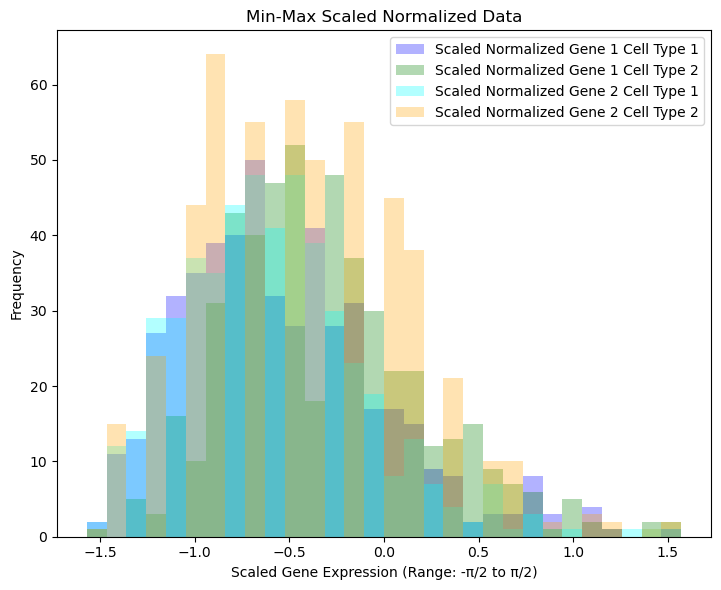

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_data_with_normalization(data1, data2, title1='Cell Type 1', title2='Cell Type 2', gene_indices=[0, 1]):
    """
    Visualizes the data for the specified genes from both cell types.
    Includes normalization by library size, log1p transformation, and min-max scaling.

    Args:
        data1 (numpy array): Gene expression data for cell type 1.
        data2 (numpy array): Gene expression data for cell type 2.
        title1 (str): Label for cell type 1.
        title2 (str): Label for cell type 2.
        gene_indices (list): List of indices for genes to be visualized.
    """
    # Select the specific genes to plot
    gene_data1 = data1[gene_indices, :]
    gene_data2 = data2[gene_indices, :]
    
    # Normalize the data by library size (total count for each cell)
    norm_data1 = gene_data1 / np.sum(gene_data1, axis=1, keepdims=True)
    norm_data2 = gene_data2 / np.sum(gene_data2, axis=1, keepdims=True)

    # Min-Max scale the normalized data to range from -pi/2 to pi/2   
    scaled_norm_data1 = min_max_scale(norm_data1)
    scaled_norm_data2 = min_max_scale(norm_data2)

    # Plot the original (non-transformed) data
    plt.figure(figsize=(14, 6))

    # Original data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(gene_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Original Gene 1 {title1}')
    plt.hist(gene_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Original Gene 1 {title2}')
    plt.hist(gene_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Original Gene 2 {title1}')
    plt.hist(gene_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Original Gene 2 {title2}')
    plt.xlabel('Gene Expression Value')
    plt.ylabel('Frequency')
    plt.title('Original Data')
    plt.legend()

    # Plot library size normalized data
    plt.subplot(1, 2, 2)
    plt.hist(norm_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Normalized Gene 1 {title1}')
    plt.hist(norm_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Normalized Gene 1 {title2}')
    plt.hist(norm_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Normalized Gene 2 {title1}')
    plt.hist(norm_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Normalized Gene 2 {title2}')
    plt.xlabel('Gene Expression Value (Normalized)')
    plt.ylabel('Frequency')
    plt.title('Library Size Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the log1p-transformed data
    plt.figure(figsize=(14, 6))

    # Log-transformed data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(np.log1p(gene_data1[0, :]), bins=30, alpha=0.3, color='blue', label=f'log1p Gene 1 {title1}')
    plt.hist(np.log1p(gene_data2[0, :]), bins=30, alpha=0.3, color='green', label=f'log1p Gene 1 {title2}')
    plt.hist(np.log1p(gene_data1[1, :]), bins=30, alpha=0.3, color='cyan', label=f'log1p Gene 2 {title1}')
    plt.hist(np.log1p(gene_data2[1, :]), bins=30, alpha=0.3, color='orange', label=f'log1p Gene 2 {title2}')
    plt.xlabel('Log-transformed Gene Expression')
    plt.ylabel('Frequency')
    plt.title('Log1p Transformed Data')
    plt.legend()

    # Log-transformed and normalized data for both genes
    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(norm_data1[0, :]), bins=30, alpha=0.3, color='blue', label=f'log1p Normalized Gene 1 {title1}')
    plt.hist(np.log1p(norm_data2[0, :]), bins=30, alpha=0.3, color='green', label=f'log1p Normalized Gene 1 {title2}')
    plt.hist(np.log1p(norm_data1[1, :]), bins=30, alpha=0.3, color='cyan', label=f'log1p Normalized Gene 2 {title1}')
    plt.hist(np.log1p(norm_data2[1, :]), bins=30, alpha=0.3, color='orange', label=f'log1p Normalized Gene 2 {title2}')
    plt.xlabel('Log1p Transformed (Normalized)')
    plt.ylabel('Frequency')
    plt.title('Log1p Transformed and Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the min-max scaled normalized data from -pi/2 to pi/2
    plt.figure(figsize=(14, 6))

    # Scaled normalized data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(scaled_norm_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Scaled Normalized Gene 1 {title1}')
    plt.hist(scaled_norm_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Scaled Normalized Gene 1 {title2}')
    plt.hist(scaled_norm_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Scaled Normalized Gene 2 {title1}')
    plt.hist(scaled_norm_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Scaled Normalized Gene 2 {title2}')
    plt.xlabel('Scaled Gene Expression (Range: -π/2 to π/2)')
    plt.ylabel('Frequency')
    plt.title('Min-Max Scaled Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualize the data for Gene 1 and Gene 2
visualize_data_with_normalization(ct1_data, ct2_data, gene_indices=[0, 1])


In [20]:
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.optimizers import COBYLA, L_BFGS_B, GradientDescent, CG
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.optimizers import ADAM

num_features = train_features.shape[1]
num_obs =  train_features.shape[0]
nrep = int( np.floor( num_obs * 0.2) )
ansatz = TwoLocal(num_qubits=num_features, rotation_blocks = ['ry','rz'], entanglement_blocks ='cry', entanglement='full', reps=2)

feature_map = ZZFeatureMap(feature_dimension=num_features, entanglement='full', reps=4)

sampler = Sampler()

#ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
#ansatz = RealAmplitudes(num_qubits=num_features, entanglement='full', reps=1) 
ansatz = EfficientSU2(num_qubits=num_features,  entanglement='full', reps=3)
#ansatz = TwoLocal(num_qubits=num_features, rotation_blocks = ['ry','rz'], entanglement_blocks ='cz', entanglement='full', reps=1)
#ansatz = TwoLocal(num_qubits=num_features, rotation_blocks = ['ry','rz'], entanglement_blocks ='cx', entanglement='full', reps=1)

#optimizer = COBYLA(maxiter=100)
#optimizer = CG(maxiter=50)
optimizer = L_BFGS_B(maxiter=50)
#optimizer = GradientDescent(maxiter=100)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    loss="cross_entropy" , # absolute_error | cross_entropy |squared_error
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

NameError: name 'train_features' is not defined

In [21]:
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.visualization import plot_histogram

# --- Data Simulation and Preprocessing ---
def simulate_gene_distribution(prob1, prob2, size=10, num_cells=500, seed=42):
    """Simulates gene expression data using negative binomial distributions."""
    np.random.seed(seed)
    ct1_data = np.random.negative_binomial(size, prob1, num_cells)
    ct2_data = np.random.negative_binomial(size, prob2, num_cells)
    return ct1_data, ct2_data

def min_max_scale(data):
    """Min-max scales data to the range [-π/2, π/2]."""
    scaled_data = np.empty_like(data, dtype=float)
    for i in range(data.shape[0]):
        min_value = np.min(data[i])
        max_value = np.max(data[i])
        scaled_data[i] = ((data[i] - min_value) / (max_value - min_value)) * (np.pi / 2 - (-np.pi / 2)) - (np.pi / 2)
    return scaled_data

def visualize_data_with_normalization(data1, data2, title1='Cell Type 1', title2='Cell Type 2', gene_indices=[0, 1]):
    """Visualizes gene expression data with normalization and scaling."""
    gene_data1 = data1[gene_indices, :]
    gene_data2 = data2[gene_indices, :]
    
    norm_data1 = gene_data1 / np.sum(gene_data1, axis=1, keepdims=True)
    norm_data2 = gene_data2 / np.sum(gene_data2, axis=1, keepdims=True)

    scaled_norm_data1 = min_max_scale(norm_data1)
    scaled_norm_data2 = min_max_scale(norm_data2)


    # Plot the original (non-transformed) data
    plt.figure(figsize=(14, 6))

    # Original data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(gene_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Original Gene 1 {title1}')
    plt.hist(gene_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Original Gene 1 {title2}')
    plt.hist(gene_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Original Gene 2 {title1}')
    plt.hist(gene_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Original Gene 2 {title2}')
    plt.xlabel('Gene Expression Value')
    plt.ylabel('Frequency')
    plt.title('Original Data')
    plt.legend()

    # Plot library size normalized data
    plt.subplot(1, 2, 2)
    plt.hist(norm_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Normalized Gene 1 {title1}')
    plt.hist(norm_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Normalized Gene 1 {title2}')
    plt.hist(norm_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Normalized Gene 2 {title1}')
    plt.hist(norm_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Normalized Gene 2 {title2}')
    plt.xlabel('Gene Expression Value (Normalized)')
    plt.ylabel('Frequency')
    plt.title('Library Size Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the log1p-transformed data
    plt.figure(figsize=(14, 6))

    # Log-transformed data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(np.log1p(gene_data1[0, :]), bins=30, alpha=0.3, color='blue', label=f'log1p Gene 1 {title1}')
    plt.hist(np.log1p(gene_data2[0, :]), bins=30, alpha=0.3, color='green', label=f'log1p Gene 1 {title2}')
    plt.hist(np.log1p(gene_data1[1, :]), bins=30, alpha=0.3, color='cyan', label=f'log1p Gene 2 {title1}')
    plt.hist(np.log1p(gene_data2[1, :]), bins=30, alpha=0.3, color='orange', label=f'log1p Gene 2 {title2}')
    plt.xlabel('Log-transformed Gene Expression')
    plt.ylabel('Frequency')
    plt.title('Log1p Transformed Data')
    plt.legend()

    # Log-transformed and normalized data for both genes
    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(norm_data1[0, :]), bins=30, alpha=0.3, color='blue', label=f'log1p Normalized Gene 1 {title1}')
    plt.hist(np.log1p(norm_data2[0, :]), bins=30, alpha=0.3, color='green', label=f'log1p Normalized Gene 1 {title2}')
    plt.hist(np.log1p(norm_data1[1, :]), bins=30, alpha=0.3, color='cyan', label=f'log1p Normalized Gene 2 {title1}')
    plt.hist(np.log1p(norm_data2[1, :]), bins=30, alpha=0.3, color='orange', label=f'log1p Normalized Gene 2 {title2}')
    plt.xlabel('Log1p Transformed (Normalized)')
    plt.ylabel('Frequency')
    plt.title('Log1p Transformed and Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the min-max scaled normalized data from -pi/2 to pi/2
    plt.figure(figsize=(14, 6))

    # Scaled normalized data for both genes
    plt.subplot(1, 2, 1)
    plt.hist(scaled_norm_data1[0, :], bins=30, alpha=0.3, color='blue', label=f'Scaled Normalized Gene 1 {title1}')
    plt.hist(scaled_norm_data2[0, :], bins=30, alpha=0.3, color='green', label=f'Scaled Normalized Gene 1 {title2}')
    plt.hist(scaled_norm_data1[1, :], bins=30, alpha=0.3, color='cyan', label=f'Scaled Normalized Gene 2 {title1}')
    plt.hist(scaled_norm_data2[1, :], bins=30, alpha=0.3, color='orange', label=f'Scaled Normalized Gene 2 {title2}')
    plt.xlabel('Scaled Gene Expression (Range: -π/2 to π/2)')
    plt.ylabel('Frequency')
    plt.title('Min-Max Scaled Normalized Data')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [23]:
# --- Example Usage ---
# Simulate gene expression data
ct1_data_g1, ct2_data_g1 = simulate_gene_distribution(0.2, 0.3)
ct1_data_g2, ct2_data_g2 = simulate_gene_distribution(0.5, 0.6)

# Create 2xN matrix where N is the number of cells
ct1_data = np.vstack([ct1_data_g1, ct1_data_g2])  # Stack along the rows (2xN for ct1)
ct2_data = np.vstack([ct2_data_g1, ct2_data_g2])  # Stack along the rows (2xN for ct2)

# Display the resulting matrices
print("ct1_data matrix (2xN):\n", ct1_data.shape)
print("ct2_data matrix (2xN):\n", ct2_data.shape)

ct1_data matrix (2xN):
 (2, 500)
ct2_data matrix (2xN):
 (2, 500)


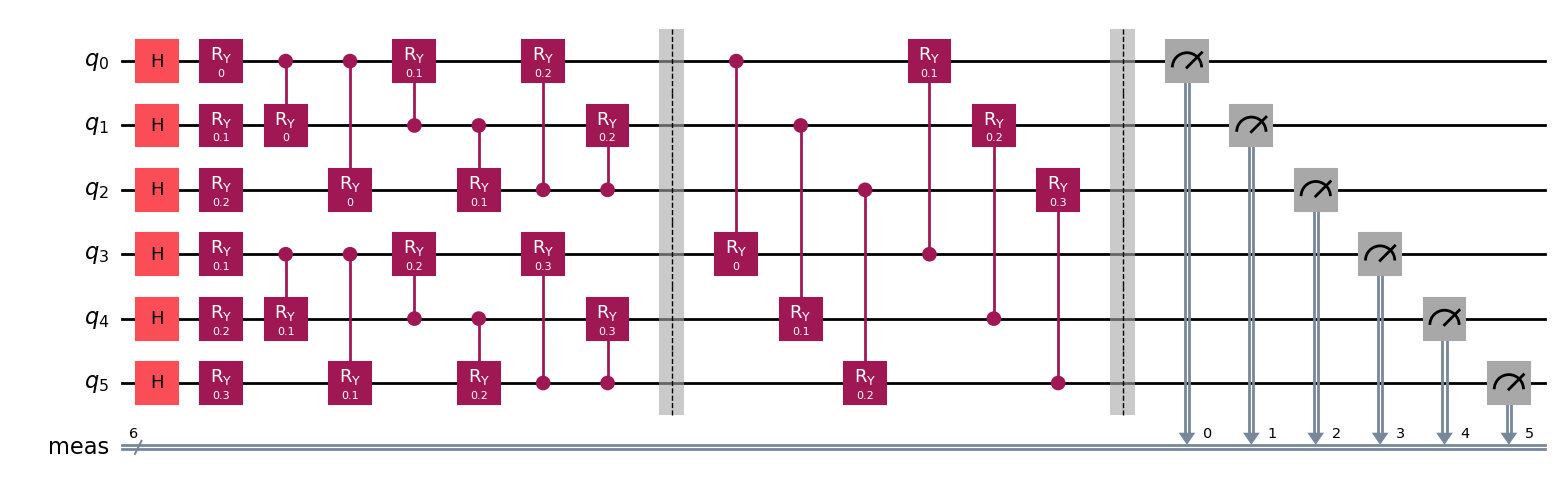

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout

def build_quantum_cell_comm_circuit(n=3):
    qc = QuantumCircuit(2 * n)  # 2n qubits for two cell types

    # Apply Hadamard gates at the start for all qubits
    for i in range(2 * n):
        qc.h(i)

    # Apply local operations for each cell type and its gene set (rotation gates)
    for i in range(n):
        qc.ry(i * 0.1, i)  # Local operation for Cell type 1
        qc.ry((i + 1) * 0.1, i + n)  # Local operation for Cell type 2

    # Entangling operations GRN-within cell type (controlled rotations within same cell type)
    for i in range(n):
        for j in range(n):
            if i != j:
                qc.cry(i * 0.1, i, j)  # Controlled-RY for all qubit pairs within Cell type 1
                qc.cry((i + 1) * 0.1, i + n, j + n)  # Controlled-RY for all qubit pairs within Cell type 2
                
    qc.barrier()

    # Apply cross-talk (controlled rotation) gates between the two cell types
    for i in range(n):
        qc.cry(i * 0.1, i, i + n)  # Controlled-RY from Cell type 1 to Cell type 2
        qc.cry((i + 1) * 0.1, i + n, i)  # Controlled-RY back from Cell type 2 to Cell type 1

    qc.measure_all()
    return qc

# Build and visualize circuit
qc = build_quantum_cell_comm_circuit(n=3)
qc.draw('mpl')


In [ ]:

# --- VQE and Loss ---
def simulate_circuit(qc, backend=AerSimulator(), params=None):
    """Simulates the quantum circuit and calculates the loss."""
    bound_qc = qc.bind_parameters(params)
    simulator = AerSimulator()
    tqc = transpile(bound_qc, simulator)
    result = simulator.run(tqc).result()
    counts = result.get_counts(tqc)

    # Example Loss (replace with your actual loss):
    loss = 0
    total_counts = sum(counts.values())

    # Example: Target distribution (replace with your actual target)
    target_probs = {'000000': 0.5, '000001': 0.1, '000010': 0.1, '000100': 0.1, '001000': 0.1, '010000': 0.1}  # Example
    for outcome in ['000000', '000001', '000010', '000100', '001000', '010000']: # Include all possible outcomes
        target_prob = target_probs.get(outcome, 0.0) #Default 0 if the outcome is not in target_probs
        measured_prob = counts.get(outcome, 0) / total_counts if total_counts > 0 else 0 #Handle zero division
        loss += abs(measured_prob - target_prob)

    return loss

def train_grn_model(data1, data2, n_genes=3, n_epochs=100, learning_rate=0.01):
    """Trains the quantum GRN model using VQE."""
    qc = build_quantum_cell_comm_circuit(n_genes)
    optimizer = COBYLA(maxiter=100)  # Choose your optimizer

    losses = []

    for epoch in range(n_epochs):
        epoch_loss = 0
        for idx in range(data1.shape[1]):  # Iterate over cells
            params_dict = {}
            for param in qc.parameters:
                if "grn1_" in str(param):
                    gene_index = int(str(param).split("_")[1])
                    params_dict[param] = data1_scaled[gene_index][idx]
                elif "grn2_" in str(param):
                    gene_index = int(str(param).split("_")[1])
                    params_dict[param] = data2_scaled[gene_index][idx]
                elif "cross_" in str(param):
                    gene_index = int(str(param).split("_")[1])
                    params_dict[param] = 0.1  # Example
                elif "grn1_inter_" in str(param):
                    gene1_index = int(str(param).split("_")[2])
                    gene2_index = int(str(param).split("_")[3])
                    params_dict[param] = data1_scaled[gene1_index][idx] - data1_scaled[gene2_index][idx]
                elif "grn2_inter_" in str(param):
                    gene1_index = int(str(param).split("_")[2])
                    gene2_index = int(str(param).split("_")[3])
                    params_dict[param] = data2_scaled[gene1_index][idx] - data2_scaled[gene2_index][idx]

            loss = simulate_circuit(qc, params=params_dict)
            epoch_loss += loss

            # Optimization (using COBYLA as example)
            if epoch == 0 and idx == 0: # Initialize parameters on the first run
                initial_params = np.array(list(params_dict.values()))
                result = optimizer.minimize(lambda x: simulate_circuit(qc, params=dict(zip(qc.parameters, x))), initial_params)
            else:
                result = optimizer.minimize(lambda x: simulate_circuit(qc, params=dict(zip(qc.parameters, x))), result.x)

            # Update parameter dictionary with optimized values
            params_dict = dict(zip(qc.parameters, result.x))

        avg_epoch_loss = epoch_loss / data1.shape[1]
        losses.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_epoch_loss:.4f}")

    return losses, qc

